# Project2: Linear regression

## Import Packeges

In [1]:
#pip install seaborn --upgrade

In [2]:
import requests, bs4
from bs4 import BeautifulSoup as bs
from time import sleep
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import warnings;
warnings.filterwarnings("ignore");
sns.set_theme()
from random import randint
from IPython.core.display import clear_output



## Step1: Scraping required data

In [3]:
# write a function to generate the links
def find_links(year):
    # get HTML code for the page with year of choice
    url = "http://www.boxofficemojo.com/year/" + str(year) + "/?grossesOption=calendarGrosses"
    response = requests.get(url, verify=False)
    soup = bs(response.text)
    
    # find the website URL's for all 200 movies on this page
    links = soup.find_all(class_="a-text-left mojo-field-type-release mojo-cell-wide")
    websites = ["http://www.boxofficemojo.com" + i.next["href"] for i in links]
    
    return websites

In [4]:
# write a function to collect movie information
def get_details(web_links):
    data = []
    count = 0
    countingLoop = 0
    print(len(web_links))
    for url in web_links:
        # create periodic pauses
        if count % 15 == 0:
            sleep(4)
        print(countingLoop)
        countingLoop = countingLoop +1
        try:
            # get the HTML code for each website in the list
            response = requests.get(url)
            soup = bs(response.text)
        except:
            # Pause the loop
            sleep(30)
            #get the HTML code for each website in the list after 5 s
            response = requests.get(url)
            soup = bs(response.text)
            title = None
        
        # Pause the loop
#         sleep(3)
        
        
        
        # try to acquire details from this page, otherwise skip
        try:
            title = soup.find(class_="a-size-extra-large").text
        except:
            title = None
        try:
            world = int(soup.find_all(class_="a-size-small")[2].parent.find(class_="money").text
                        .replace("$","").replace(",",""))
        except:
            world = None
        try:
            distrib = soup.find(text="Distributor").next.text
            extra_bit = soup.find(text="Distributor").next.find(class_="a-size-small a-link-normal").text
            distrib = distrib.replace(extra_bit, "")
        except:
            try:
                distrib = soup.find(text="Distributor").next.text
            except:
                distrib = None
        try:
            budget = int(soup.find(text="Budget").next.text.replace("$","").replace(",",""))
        except:
            budget = None
        if soup.find(text="Release Date"):
            try:
                release = pd.to_datetime(soup.find(text="Release Date").next.text)
            except:
                try:
                    release = pd.to_datetime(soup.find(text="Release Date").next.text.split("\n            ")[0])
                except:
                    release = None
        else:
            try:
                release = pd.to_datetime(soup.find(text="Release Date\n        \n            (Wide)")
                                         .next.text.split(" (")[0])
            except:
                release = None
        try:
            mpaa = soup.find(text="MPAA").next.text
        except:
            mpaa = None
        try:
            run_time = datetime.datetime.strptime(soup.find(text="Running Time").next.text, "%H hr %M min")
            run_time -= datetime.datetime.strptime("00:00", "%H:%M")
        except:
            try:
                run_time = datetime.datetime.strptime(soup.find(text="Running Time").next.text, "%H hr")
                run_time -= datetime.datetime.strptime("00:00", "%H:%M")
            except:
                try:
                    run_time = datetime.datetime.strptime(soup.find(text="Running Time").next.text, "%M min")
                    run_time -= datetime.datetime.strptime("00:00", "%H:%M")
                except:
                    run_time = None
        try:
            genre = soup.find(text="Genres").next.text.replace("\n    ", "").replace("   ","")
        except:
            genre = None
        try:
            days = int(soup.find(text="In Release").next.text.split()[0].replace(",",""))
        except:
            days = None
        try:
            theaters = int(soup.find(text="Widest Release").next.text.split()[0].replace(",",""))
        except:
            try:
                theaters = int(soup.find(text="Opening").next.next.next.next.next
                               .replace("\n            theaters", "").replace(",",""))
            except:
                theaters = None
        try:
            rank = int(soup.find("td").parent.find(class_="a-text-right mojo-field-type-rank").text)
        except:
            rank = None
        
        # create a dictionary with this information
        my_dict = {"Movie Title":title, "Worldwide Gross":world, "Distributor":distrib, "Budget": budget,
                   "Release Date":release, "MPAA":mpaa, "Running Time": run_time, "Genres":genre,
                   "Days In Release": days, "Number of Theaters":theaters, "Rank on First Day":rank}
        # add each dictionary to a list
        data.append(my_dict)
        
        count += 1
    
    # return a pandas dataframe made from the list
    return pd.DataFrame(data)

### 2011 Data

In [5]:
# create a dataframe with 2012 movies

# df_2011 = get_details(find_links(2011))

In [6]:
# save in a pickle file
# with open("df_2011.pickle", "wb") as file:
#     pickle.dump(df_2011, file)

### 2012 Data

In [7]:
# create a dataframe with 2012 movies

#df_2012 = get_details(find_links(2012))


In [8]:
# save in a pickle file
# with open("df_2012.pickle", "wb") as file:
#     pickle.dump(df_2012, file)

### 2013 Data

In [9]:
# create a dataframe with 2012 movies
# df_2013 = get_details(find_links(2013))

In [10]:
# save in a pickle file
# with open("df_2013.pickle", "wb") as file:
#     pickle.dump(df_2013, file)

### 2014 Data

In [11]:
# create a dataframe with 2012 movies
# df_2014 = get_details(find_links(2014))

In [12]:
# save in a pickle file
# with open("df_2014.pickle", "wb") as file:
#     pickle.dump(df_2014, file)

### 2015 Data

In [13]:
# create a dataframe with 2012 movies
# df_2015 = get_details(find_links(2015))

In [14]:
# save in a pickle file
# with open("df_2015.pickle", "wb") as file:
#     pickle.dump(df_2015, file)

### 2016 Data

In [15]:
# create a dataframe with 2012 movies
# df_2016 = get_details(find_links(2016))

In [16]:
# save in a pickle file
# with open("df_2016.pickle", "wb") as file:
#     pickle.dump(df_2016, file)

### 2017 Data

In [17]:
# create a dataframe with 2012 movies
# df_2017 = get_details(find_links(2017))

In [18]:
# save in a pickle file
# with open("df_2017.pickle", "wb") as file:
#     pickle.dump(df_2017, file)

### 2018 Data 

In [19]:
# create a dataframe with 2012 movies
# df_2018 = get_details(find_links(2018))

In [20]:
# save in a pickle file
# with open("df_2018.pickle", "wb") as file:
#     pickle.dump(df_2018, file)

### 2019 Data 

In [21]:
# create a dataframe with 2012 movies
# df_2019 = get_details(find_links(2019))

In [22]:
# save in a pickle file
# with open("df_2019.pickle", "wb") as file:
#     pickle.dump(df_2019, file)

### 2020 Data 

In [23]:
# create a dataframe with 2012 movies
# df_2020 = get_details(find_links(2020))

In [24]:
# save in a pickle file
# with open("df_2020.pickle", "wb") as file:
#     pickle.dump(df_2020, file)

### 2021 Data

In [25]:
# create a dataframe with 2012 movies
# df_2021 = get_details(find_links(2021))

In [26]:
# save in a pickle file
# with open("df_2021.pickle", "wb") as file:
#     pickle.dump(df_2021, file)

## Step2: Data Combining Cleaning

In [27]:
# read in the data saved from each year
data_list = []
for i in range(2011, 2022):
    with open("./pickles/df_" + str(i) + ".pickle", "rb") as file:
        data_list.append(pickle.load(file))

In [28]:
# combine dataframes together, remove prior to 2012, and sort by Release Date
complete_df = pd.concat(data_list)
complete_df = complete_df[complete_df["Release Date"].dt.year > 2010]
complete_df = complete_df.sort_values("Release Date")

In [29]:
# drop some of the unnecessary columns
complete_df.drop(columns=["Movie Title", "Days In Release", "Rank on First Day"], inplace=True)

In [30]:
# drop duplicates and NA values, then reset the index
complete_df.drop_duplicates(inplace=True)
complete_df = complete_df.dropna()
complete_df = complete_df.set_index(pd.Series(range(len(complete_df))))
complete_df.head()

,Worldwide Gross,Distributor,Budget,Release Date,MPAA,Running Time,Genres,Number of Theaters
0,91627228,Relativity Media,40000000.0,2011-01-07,PG-13,01:35:00,Action Adventure Fantasy,2827.0
1,69721966,Universal Pictures,70000000.0,2011-01-14,PG-13,01:51:00,Comedy Drama,2943.0
2,227817248,Sony Pictures Entertainment (SPE),120000000.0,2011-01-14,PG-13,01:59:00,Action Comedy Crime,3584.0
3,12104765,Sony Pictures Classics,30000000.0,2011-01-14,R,02:14:00,Comedy Drama,281.0
4,8087000,The Weinstein Company,15000000.0,2011-01-21,R,01:44:00,Drama,277.0


In [31]:
# fix some of the distributor names
complete_df["Distributor"].replace("20th Century Studios", "Twentieth Century Fox", inplace=True)
complete_df["Distributor"].replace("Fox Searchlight Pictures", "Twentieth Century Fox", inplace=True)
complete_df["Distributor"].replace("Sony Pictures Classics", "Sony Pictures", inplace=True)
complete_df["Distributor"].replace("Sony Pictures Entertainment (SPE)", "Sony Pictures", inplace=True)
complete_df["Distributor"].replace("Walt Disney Studios Motion Pictures", "Walt Disney Pictures", inplace=True)

# combine many distributors into an "other" category
extra = complete_df["Distributor"].value_counts()[complete_df["Distributor"].value_counts() <= 10].index
for i in extra:
    complete_df["Distributor"].replace(i, "Other Distributor", inplace=True)

In [32]:
# collect month and year information from Release Date
complete_df["Release Month"] = complete_df["Release Date"].dt.strftime("%b")
complete_df["Release Year"] = complete_df["Release Date"].dt.year.astype(str)
complete_df.drop(columns="Release Date", inplace=True)

In [33]:
# combine G and PG since there are very few G-rated movies
complete_df["MPAA"].replace("G", "G / PG", inplace=True)
complete_df["MPAA"].replace("PG", "G / PG", inplace=True)

In [34]:
# convert the "Running Time" column into minutes (numerical data rather than timedelta)
hours = complete_df["Running Time"].dt.components["hours"]
minutes = complete_df["Running Time"].dt.components["minutes"]
complete_df["Running Time"] = hours*60 + minutes

In [35]:
# create a list of all genres
genres = []
for i in complete_df["Genres"]:
    genres += i.split()

# replace the ones with low counts
extra = np.unique(genres)[np.unique(genres, return_counts=True)[1] <= 10]
for i in extra:
    complete_df["Genres"] = complete_df["Genres"].map(lambda x: x.replace(i, "Other") if i in x.split() else x)

In [36]:
complete_df.head()

,Worldwide Gross,Distributor,Budget,MPAA,Running Time,Genres,Number of Theaters,Release Month,Release Year
0,91627228,Relativity Media,40000000.0,PG-13,95,Action Adventure Fantasy,2827.0,Jan,2011
1,69721966,Universal Pictures,70000000.0,PG-13,111,Comedy Drama,2943.0,Jan,2011
2,227817248,Sony Pictures,120000000.0,PG-13,119,Action Comedy Crime,3584.0,Jan,2011
3,12104765,Sony Pictures,30000000.0,R,134,Comedy Drama,281.0,Jan,2011
4,8087000,The Weinstein Company,15000000.0,R,104,Drama,277.0,Jan,2011


In [37]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 9 columns):
Worldwide Gross       1040 non-null int64
Distributor           1040 non-null object
Budget                1040 non-null float64
MPAA                  1040 non-null object
Running Time          1040 non-null int64
Genres                1040 non-null object
Number of Theaters    1040 non-null float64
Release Month         1040 non-null object
Release Year          1040 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 81.2+ KB


## Step3: EDA 

In [38]:
# transform dependent variable
complete_df["Worldwide Gross"] = np.sqrt(complete_df["Worldwide Gross"])

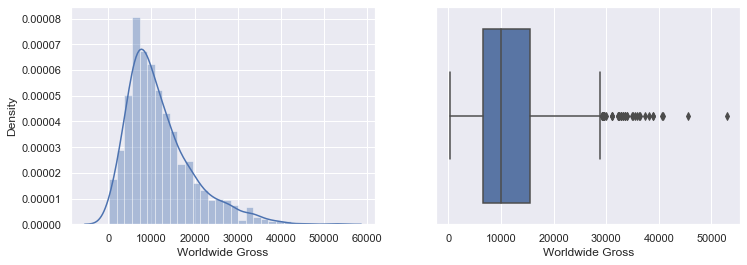

In [39]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(complete_df["Worldwide Gross"])

plt.subplot(1,2,2)
sns.boxplot(complete_df["Worldwide Gross"]);

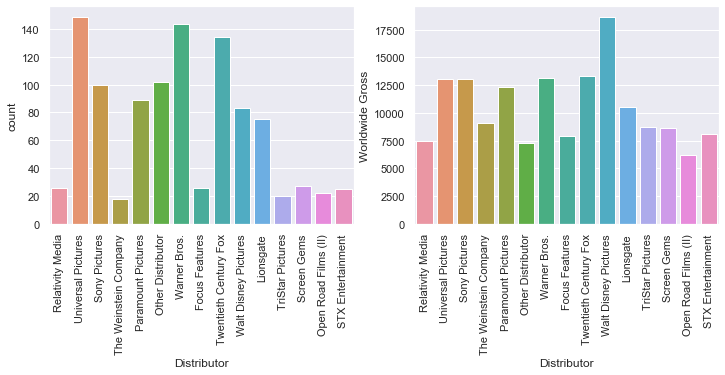

In [40]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(complete_df["Distributor"])
plt.xticks(rotation="vertical")

plt.subplot(1,2,2)
sns.barplot(x=complete_df["Distributor"], y=complete_df["Worldwide Gross"], ci=None)
plt.xticks(rotation="vertical");

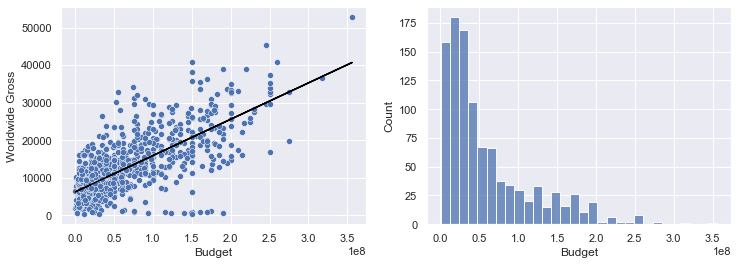

In [41]:
x = complete_df["Budget"]
y = complete_df["Worldwide Gross"]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black")

plt.subplot(1,2,2)
sns.histplot(x);

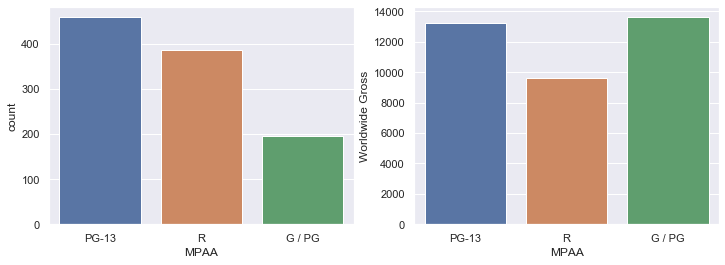

In [42]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(complete_df["MPAA"])

plt.subplot(1,2,2)
sns.barplot(x=complete_df["MPAA"], y=complete_df["Worldwide Gross"], ci=None);

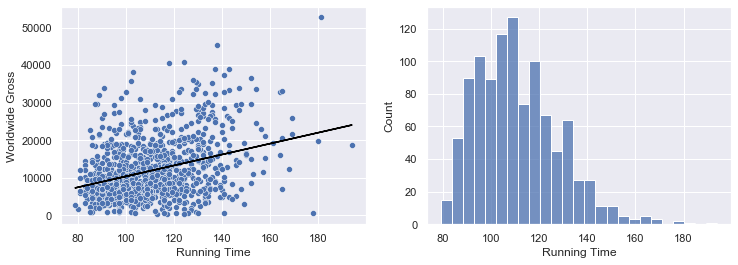

In [43]:
x = complete_df["Running Time"]
y = complete_df["Worldwide Gross"]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black")

plt.subplot(1,2,2)
sns.histplot(x);

In [44]:
# create a list of all genres
genres = []
for i in complete_df["Genres"]:
    genres += i.split()
genres = sorted(genres)
    
# find the averages for each unique genre
averages = []
for i in np.unique(genres):
    mask = complete_df["Genres"].map(lambda x: True if i in x.split() else False)
    averages.append(complete_df["Worldwide Gross"][mask].mean())

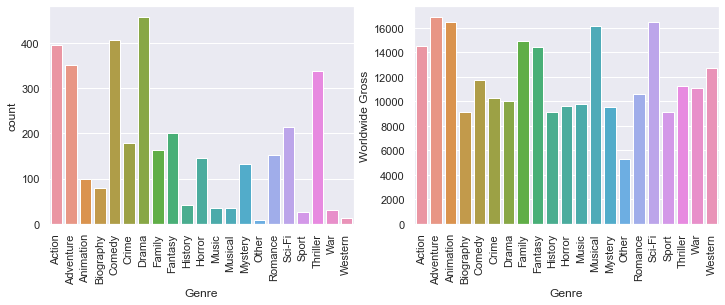

In [45]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(genres)
plt.xticks(rotation="vertical")
plt.xlabel("Genre")

plt.subplot(1,2,2)
sns.barplot(x=np.unique(genres), y=averages, ci=None)
plt.xticks(rotation="vertical")
plt.xlabel("Genre")
plt.ylabel("Worldwide Gross");

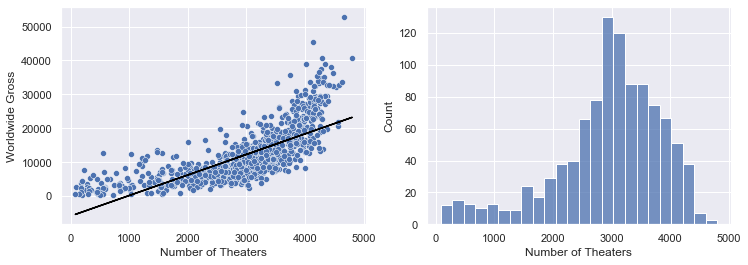

In [46]:
x = complete_df["Number of Theaters"]
y = complete_df["Worldwide Gross"]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black")

plt.subplot(1,2,2)
sns.histplot(x);

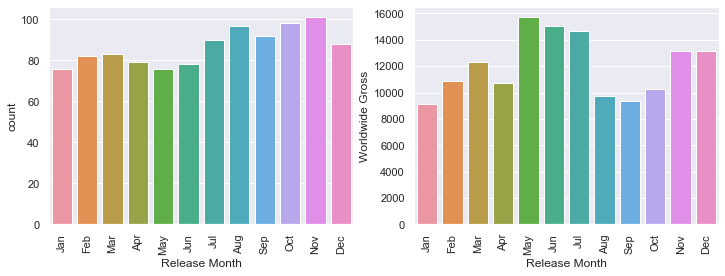

In [47]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(complete_df["Release Month"])
plt.xticks(rotation="vertical")

plt.subplot(1,2,2)
sns.barplot(x=complete_df["Release Month"], y=complete_df["Worldwide Gross"], ci=None)
plt.xticks(rotation="vertical");

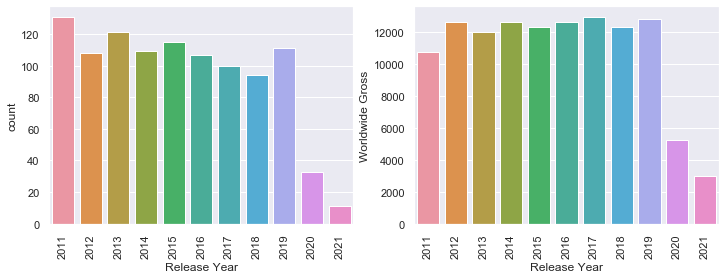

In [48]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(complete_df["Release Year"])
plt.xticks(rotation="vertical")

plt.subplot(1,2,2)
sns.barplot(x=complete_df["Release Year"], y=complete_df["Worldwide Gross"], ci=None)
plt.xticks(rotation="vertical");


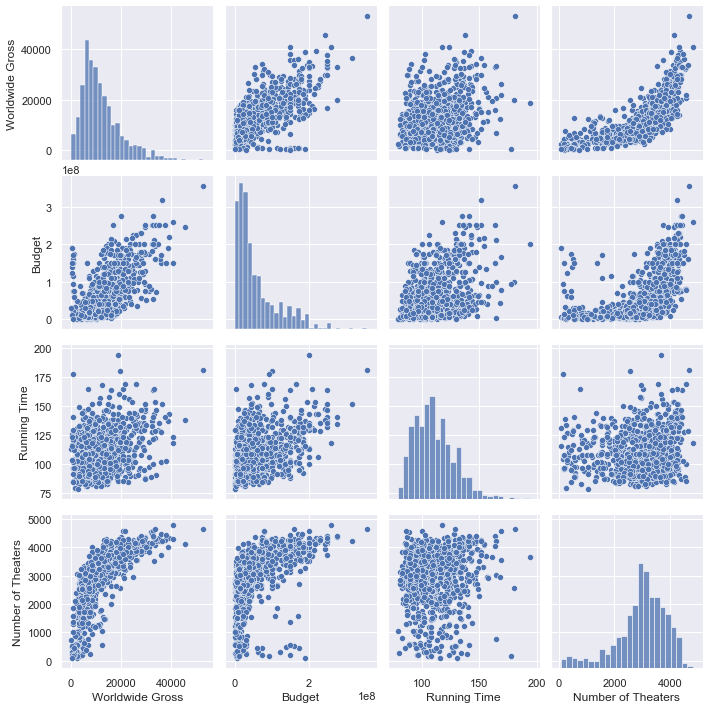

In [49]:
sns.pairplot(complete_df[["Worldwide Gross", "Budget", "Running Time", "Number of Theaters"]]);


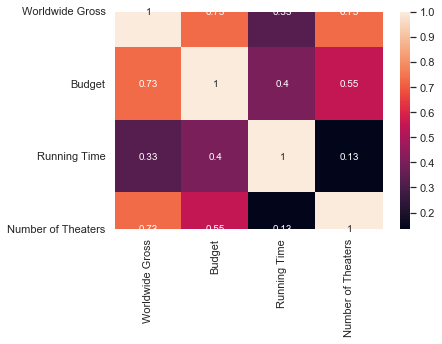

In [50]:
sns.heatmap(complete_df.corr(), annot=True);


### Dummy variables

In [51]:
# create columns for each unique Distributor, removing the first one (Focus Features)
complete_df = pd.concat([complete_df, pd.get_dummies(complete_df["Distributor"], drop_first=True)], axis=1)
complete_df.drop(columns="Distributor", inplace=True)

In [52]:
# create columns for each unique MPAA, removing the first one (G / PG)
complete_df = pd.concat([complete_df, pd.get_dummies(complete_df["MPAA"], drop_first=True)], axis=1)
complete_df.drop(columns="MPAA", inplace=True)

In [53]:
# create columns for each unique Genre, removing the first one (Action)
genres = np.unique([j for i in complete_df["Genres"].unique() for j in i.split()])[1:]
for i in genres:
    complete_df[i] = complete_df["Genres"].map(lambda x: 1 if i in x.split() else 0)
complete_df.drop(columns="Genres", inplace=True)

In [54]:
# create columns for each unique Release Month, removing the first one (April)
complete_df = pd.concat([complete_df, pd.get_dummies(complete_df["Release Month"], drop_first=True)], axis=1)
complete_df.drop(columns="Release Month", inplace=True)

In [55]:
# create columns for each unique Release Year, removing the first one (2012)
complete_df = pd.concat([complete_df, pd.get_dummies(complete_df["Release Year"], drop_first=True)], axis=1)
complete_df.drop(columns="Release Year", inplace=True)

## Step4: Linear Regression 

In [56]:
# pick out the columns that show significant p-values
cols = ["Worldwide Gross", "Budget", "Running Time", "Number of Theaters", "Open Road Films (II)",
        "Universal Pictures", "Walt Disney Pictures", "Animation", "Family", "Fantasy", "Music", "Musical",
        "Sport", "2020", "2021"]
df = complete_df[cols]

### Ordinary Least Squares(OLS)

In [57]:
# start with Ordinary Least Squares to get a look at the Linear Regression model
model = sm.OLS(df["Worldwide Gross"], sm.add_constant(df.drop(columns="Worldwide Gross")))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Worldwide Gross   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     194.4
Date:                Wed, 20 Oct 2021   Prob (F-statistic):          1.17e-276
Time:                        16:03:05   Log-Likelihood:                -10102.
No. Observations:                1040   AIC:                         2.023e+04
Df Residuals:                    1025   BIC:                         2.031e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7362.4048   1068.200     -6.892      0.000   -9458.513   -5266.296
Budget                5.753e-05   3.27e-06     17.613      0.000    5.11e-05    6.39e-05
Running Time            47.8248      8.920      5.362      0.000      30.321      65.328
Number of Theaters       3.5912      0.176     20.387      0.000       3.245       3.937
Open Road Films (II) -2277.2379    875.111     -2.602      0.009   -3994.451    -560.025
Universal Pictures    1370.5592    365.912      3.746      0.000     652.537    2088.582
Walt Disney Pictures  1512.7284    529.771      2.855      0.004     473.169    2552.288
Animation             2690.2047    631.387      4.261      0.000    1451.247    3929.163
Family                -945.3088    546.907     -1.728      0.084   -2018.495     127.877
Fantasy               -912.7559    370.462     -2.464      0.014   -1639.707    -185.805
Music                 1412.6606    694.307      2.035      0.042      50.236    2775.085
Musical               1550.2454    738.051      2.100      0.036     101.981    2998.509
Sport                -2114.2132    806.764     -2.621      0.009   -3697.311    -531.115
2020                 -4799.2192    741.741     -6.470      0.000   -6254.724   -3343.714
2021                 -4759.8007   1278.348     -3.723      0.000   -7268.279   -2251.323
==============================================================================
Omnibus:                       85.827   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.837
Skew:                           0.599   Prob(JB):                     1.17e-30
Kurtosis:                       4.321   Cond. No.                     8.56e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

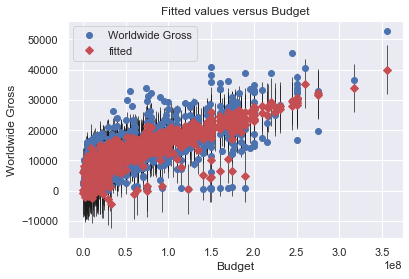

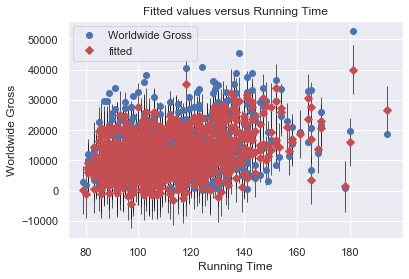

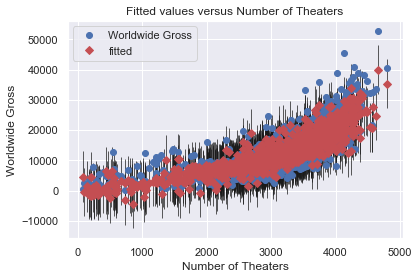

In [58]:
for i in [1,2,3]:
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(fit, i, ax=ax)

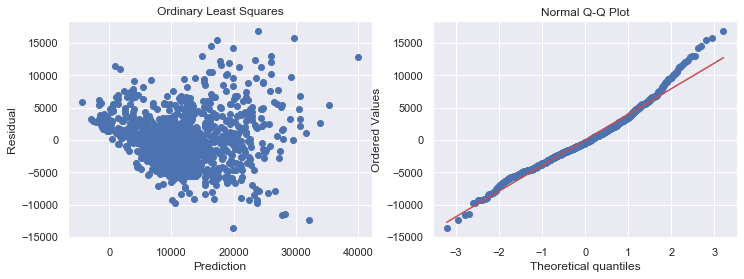

In [59]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(fit.predict(), fit.resid)
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Ordinary Least Squares")

plt.subplot(1,2,2)
stats.probplot(fit.resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot");

In [60]:
print("Mean Squared Error :", mse(df["Worldwide Gross"], fit.predict()))
print("Mean Absolute Error :", mae(df["Worldwide Gross"], fit.predict()))

Mean Squared Error : 16020083.5206302
Mean Absolute Error : 3040.557092551045


In [61]:
def report_scores(data, test_size=0.2, random_state=40):
    # define x and y
    x = data.drop(columns="Worldwide Gross")
    y = data["Worldwide Gross"]
    
    # split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    # create the model
    model = LinearRegression()
    fit = model.fit(x_train, y_train)

    # print the results
    print("R² training set :", fit.score(x_train, y_train))
    print("R² test set :", fit.score(x_test, y_test))
    print("")
    print("Mean Squared Error :", mse(y, fit.predict(x)))
    print("Mean Absolute Error :", mae(y, fit.predict(x)))
    print("")
    
    # create a dataframe of the coefficients and the intercept
    results = pd.DataFrame(list(zip(x.columns, fit.coef_)), columns=["Features", "Coefficients"])
    results.loc[-1] = ["Intercept", fit.intercept_]
    results.index += 1
    results = results.sort_index()
    results["Squared"] = results["Coefficients"]**2
    
    # return the data
    return x, y, x_train, x_test, y_train, y_test, fit.predict(x), results

In [62]:
def cv_models(data, test_size=0.2, random_state_1=40, n_splits=10, random_state_2=40):
    # define x and y
    x = data.drop(columns="Worldwide Gross")
    y = data["Worldwide Gross"]
    
    # split the data into training and test sets
    x, x_test, y, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state_1)

    # loop through 10 different training and validation sets
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state_2)
    scores_train, scores_val = [], []

    for train_ind, val_ind in kf.split(x, y):
        # create the model
        model = LinearRegression()
        fit = model.fit(x.iloc[train_ind], y.iloc[train_ind])
        
        # append each score to the appropriate list
        scores_train.append(fit.score(x.iloc[train_ind], y.iloc[train_ind]))
        scores_val.append(fit.score(x.iloc[val_ind], y.iloc[val_ind]))

    # print the average results
    print("average R² training set :", np.mean(scores_train))
    print("average R² validation set :", np.mean(scores_val))

In [63]:
def ridge(data, test_size=0.2, random_state=40):
    # define x and y
    x = data.drop(columns="Worldwide Gross")
    y = data["Worldwide Gross"]
    
    # split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state) 
    
    # standardize the data first
    std = StandardScaler()
    std.fit(x_train.values)
    x_tr = std.transform(x_train.values)
    x_te = std.transform(x_test.values)
    
    # loop through the model for a list of lambda values to find the best one
    alphas = 10**np.linspace(-10, 10, 200)
    scores_train, scores_te = [], []

    for a in alphas:
        lr_model_ridge = Ridge(alpha=a)
        lr_model_ridge.fit(x_tr, y_train)
        scores_train.append(lr_model_ridge.score(x_tr, y_train))
        scores_te.append(lr_model_ridge.score(x_te, y_test))

    best_alpha = alphas[scores_te.index(max(scores_te))]

    # plot this process
    plt.scatter(alphas, scores_train, label="train")
    plt.scatter(alphas, scores_te, label="test")
    plt.xlabel("Lambda Values")
    plt.ylabel("R² Scores")
    plt.legend()

    # use that lambda value in Ridge Regression
    lr_model_ridge = Ridge(alpha=best_alpha)
    lr_model_ridge.fit(x_tr, y_train)

    print("R² training set :", lr_model_ridge.score(x_tr, y_train))
    print("R² test set :", lr_model_ridge.score(x_te, y_test))

In [64]:
def lasso(data, test_size=0.2, random_state=40):
    # define x and y
    x = data.drop(columns="Worldwide Gross")
    y = data["Worldwide Gross"]
    
    # split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state) 
    
    # standardize the data first
    std = StandardScaler()
    std.fit(x_train.values)
    x_tr = std.transform(x_train.values)
    x_te = std.transform(x_test.values)
    
    # loop through the model for a list of lambda values to find the best one
    alphas = 10**np.linspace(-10, 10, 200)
    scores_train, scores_te = [], []

    for a in alphas:
        lr_model_lasso = Lasso(alpha=a)
        lr_model_lasso.fit(x_tr, y_train)
        scores_train.append(lr_model_lasso.score(x_tr, y_train))
        scores_te.append(lr_model_lasso.score(x_te, y_test))

    best_alpha = alphas[scores_te.index(max(scores_te))]

    # plot this process
    plt.scatter(alphas, scores_train, label="train")
    plt.scatter(alphas, scores_te, label="test")
    plt.xlabel("Lambda Values")
    plt.ylabel("R² Scores")
    plt.legend()

    # use that lambda value in Ridge Regression
    lr_model_lasso = Lasso(alpha=best_alpha)
    lr_model_lasso.fit(x_tr, y_train)

    print("R² training set :", lr_model_lasso.score(x_tr, y_train))
    print("R² test set :", lr_model_lasso.score(x_te, y_test))

In [71]:
# trained based on cross validation
cv_models(df)

average R² training set : 0.732550829500247
average R² validation set : 0.7192714966913403


R² training set : 0.7200759615266044
R² test set : 0.7114385186048213


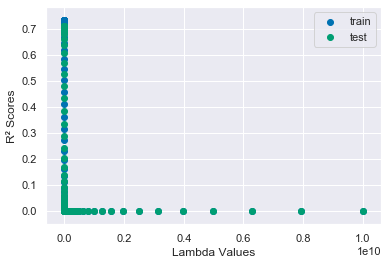

In [72]:
ridge(df)

R² training set : 0.7291013168457757
R² test set : 0.7007070821144743


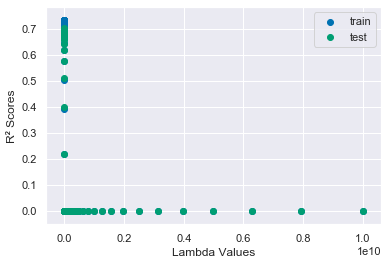

In [73]:
lasso(df)


In [74]:
# reported based on test data set
x, y, x_train, x_test, y_train, y_test, y_pred, results = report_scores(df)
results

R² training set : 0.7319349504458013
R² test set : 0.6962446060091543

Mean Squared Error : 16093950.13215569
Mean Absolute Error : 3054.718760322208



,Features,Coefficients,Squared
0,Intercept,-7041.053642,4.957644e+07
1,Budget,0.000061,3.671679e-09
2,Running Time,42.382807,1.796302e+03
3,Number of Theaters,3.656055,1.336674e+01
4,Open Road Films (II),-1961.843162,3.848829e+06
5,Universal Pictures,1392.565400,1.939238e+06
6,Walt Disney Pictures,1355.858632,1.838353e+06
7,Animation,2673.512119,7.147667e+06
8,Family,-1236.167104,1.528109e+06
9,Fantasy,-1106.825166,1.225062e+06


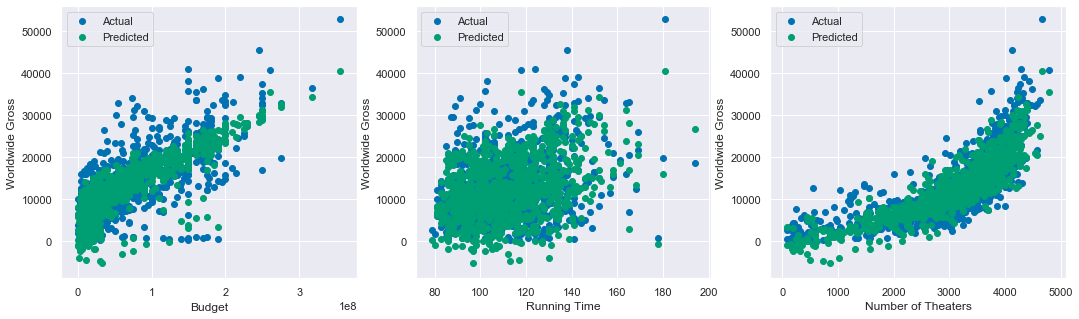

In [69]:
plt.figure(figsize=(18,5))
plt.style.use("seaborn-colorblind")

plt.subplot(1,3,1)
plt.scatter(x["Budget"], y, label="Actual")
plt.scatter(x["Budget"], y_pred, label="Predicted")
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.legend()

plt.subplot(1,3,2)
plt.scatter(x["Running Time"], y, label="Actual")
plt.scatter(x["Running Time"], y_pred, label="Predicted")
plt.xlabel("Running Time")
plt.ylabel("Worldwide Gross")
plt.legend()

plt.subplot(1,3,3)
plt.scatter(x["Number of Theaters"], y, label="Actual")
plt.scatter(x["Number of Theaters"], y_pred, label="Predicted")
plt.xlabel("Number of Theaters")
plt.ylabel("Worldwide Gross")
plt.legend();

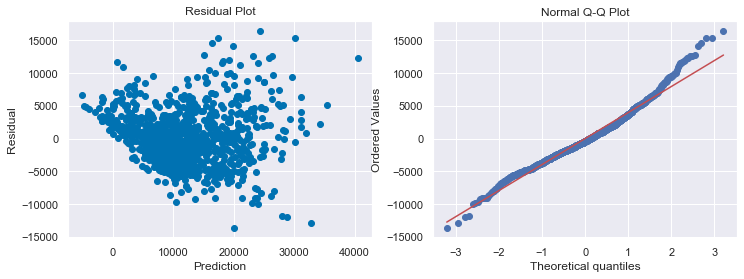

In [70]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(y_pred, y - y_pred)
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Residual Plot")

plt.subplot(1,2,2)
stats.probplot(y - y_pred, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot");